In [56]:
%load_ext autoreload
%autoreload 2
%load_ext google.colab.data_table

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


### **0 - Librairies**
---

In [57]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram
from pandas.plotting import parallel_coordinates
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
                           


#### Contexte
---
L'entreprise de vente de poules *La poule qui chante* aimerait s'internationaliser, elle nous charge de faire une étude qui permettrait de déterminer des pays potentiels à l'importation de ses poules.

Pour arriver à mes fins j'aurai comme outils, je devrai utiliser les méthodes suivantes :      
-- **Analyse en Composantes Principales (ACP**) :  

*   Elle permettra de résumer l’information qui est contenue dans une large base de données en un certain nombre de variables synthétiques appelées : Composantes principales. 
*   Le but suivant est de pouvoir projeter ces données sur l’hyperplan le plus proche afin d’avoir une représentation simple de nos données.

*   Évidemment, qui dit réduction de dimension dit perte d’informations. C’est là tout l’enjeu que représente une Analyse en Composantes principales. Il faut pouvoir réduire la dimension de nos données tout en conservant un maximum d’informations.

-- **Clustering** :


*  Elle consiste à regrouper des points de données par similarité ou par distance. C’est une méthode d’apprentissage non supervisée et une technique populaire d’analyse statistique des données. 
*   Pour un ensemble donné de points, vous pouvez utiliser des algorithmes de classification pour classer ces points de données individuels dans des groupes spécifiquesÉlément de liste.


*   La but des algorithmes de clustering est de donner un sens aux données et d’extraire de la valeur à partir de grandes quantités de données structurées et non structurées. Ces algorithmes vous permettent de séparer les données en fonction de leurs propriétés ou fonctionnalités et de les regrouper dans différents clusters en fonction de leurs similitudes.
















#### Dataset
---

In [58]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/P9/P9 _ Docs finals/df.csv",index_col="Area")
data.tail(10)

,Import Quantity,Export Quantity,Production,GDP growth per capita (US$),GDP per capita (US$),Avg. population growth (annual %),Political_Stability,Region,Union european
Area,,,,,,,,,
United Republic of Tanzania,6.0,0.0,81.0,4.051882,1083.217052,3.04,-0.56,Africa,0
United States of America,123.0,3725.0,22858.0,3.495662,64949.439748,0.67,0.48,Americas,0
Uruguay,6.0,3.0,31.0,-5.431487,17688.012221,0.35,1.05,Americas,0
Uzbekistan,21.0,0.0,64.0,12.797953,1750.258925,1.64,-0.28,Asia,0
Vanuatu,4.0,0.0,1.0,-0.316851,3115.357712,2.66,0.84,Oceania,0
Venezuela (Bolivarian Republic of),0.0,0.0,428.0,-25.463949,5264.842747,-0.61,-1.34,Americas,0
Viet Nam,203.0,37.0,1089.0,5.799010,2715.275874,1.03,0.20,Asia,0
Yemen,140.0,0.0,192.0,7.724414,865.726138,2.53,-3.00,Asia,0
Zambia,23.0,9.0,51.0,-13.936464,1305.060260,3.06,0.14,Africa,0


In [59]:
data.to_csv("/content/drive/MyDrive/Colab Notebooks/P9/P9 _ Docs finals/data_tableau.csv")

In [60]:
data.columns

Index(['Import Quantity', 'Export Quantity', 'Production',
       'GDP growth per capita (US$)', 'GDP per capita (US$)',
       'Avg. population growth (annual %)', 'Political_Stability', 'Region',
       'Union european'],
      dtype='object')

In [61]:
# Suppresion des colonnes région & UE
X = data.drop(["Region", "Union european"], axis=1)

### **1 - Pre-processing**
---

##### 1.1. Gestion des anomalies

In [62]:
from sklearn.ensemble import IsolationForest
model = IsolationForest(n_estimators=200, contamination=0.02, random_state=42)
model.fit(X)
outliers = model.predict(X) == -1 
out = data[outliers]
out

,Import Quantity,Export Quantity,Production,GDP growth per capita (US$),GDP per capita (US$),Avg. population growth (annual %),Political_Stability,Region,Union european
Area,,,,,,,,,
Brazil,5.0,4099.0,14137.0,-2.349607,8936.360101,0.83,-0.36,Americas,0
"China, mainland",795.0,588.0,20442.0,2.331421,9959.637355,0.51,-0.26,Asia,0
Syrian Arab Republic,23.0,0.0,122.0,19.505591,1558.084651,-2.85,-2.74,Asia,0
United States of America,123.0,3725.0,22858.0,3.495662,64949.439748,0.67,0.48,Americas,0


In [63]:
# Retrait des outliers
data = data[~data.index.isin(X[outliers].index.tolist())]
X = X[~X.index.isin(X[outliers].index.tolist())]

#### 1.2. Standardisation des données

In [64]:
# Import de la fonction sklearn
from sklearn.preprocessing import StandardScaler

# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Check
pd.DataFrame(X_scaled, columns=X.columns).describe().round(2)

,Import Quantity,Export Quantity,Production,GDP growth per capita (US$),GDP per capita (US$),Avg. population growth (annual %),Political_Stability
count,172.00,172.00,172.00,172.00,172.00,172.00,172.00
mean,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.47,-0.29,-0.52,-4.20,-0.69,-2.34,-3.13
25%,-0.46,-0.29,-0.51,-0.42,-0.61,-0.73,-0.59
50%,-0.37,-0.29,-0.43,0.01,-0.41,-0.11,0.11
75%,0.00,-0.23,-0.19,0.44,0.13,0.79,0.86
max,5.52,7.75,5.25,3.77,4.85,3.18,1.76


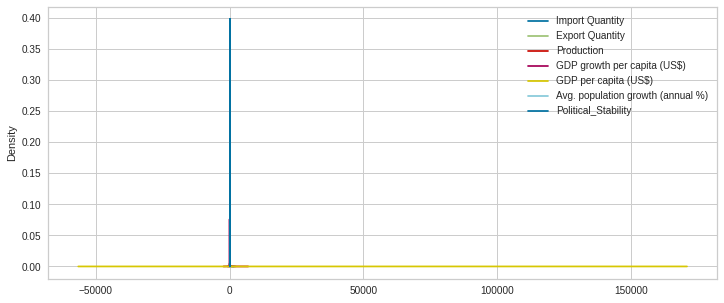

In [65]:
# Before standardisation
X1 = pd.DataFrame(X,columns=X.columns)
X1.plot(kind='density',sharex=True,figsize=(12,5),layout=(10,1))
plt.show()

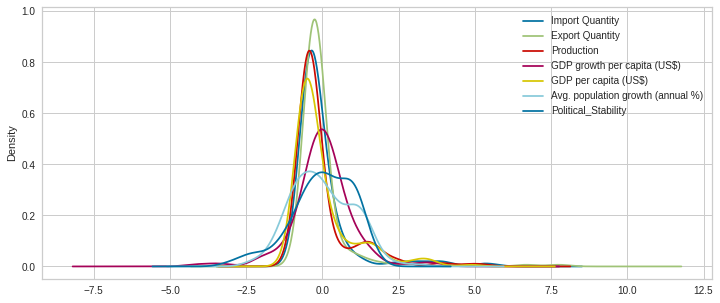

In [66]:
# After standardisation
pd.DataFrame(X_scaled,columns=X.columns).plot(kind='density',sharex=True,figsize=(12,5),layout=(10,1))
plt.show()

In [67]:
pd.DataFrame(X_scaled, index=X.index,columns=X.columns).head().round(4)

,Import Quantity,Export Quantity,Production,GDP growth per capita (US$),GDP per capita (US$),Avg. population growth (annual %),Political_Stability
Area,,,,,,,
Afghanistan,-0.2324,-0.2930,-0.4857,0.0222,-0.6820,1.2895,-2.8617
Albania,-0.3529,-0.2930,-0.5057,0.2181,-0.4456,-1.2653,0.5115
Algeria,-0.4734,-0.2877,-0.1564,-0.6273,-0.5124,0.6043,-0.7494
Angola,1.0492,-0.2930,-0.4594,-2.0857,-0.5692,1.7717,-0.2429
Antigua and Barbuda,-0.4350,-0.2930,-0.5207,0.5732,0.1410,-0.2755,0.8887


### **2 - Analyse en Composantes Principales (ACP)**
---

In [68]:
# Import the PCA function from sklearn
from sklearn.decomposition import PCA

# Create the PCA model
model_pca = PCA()

# Fit the model with the standardised data
X_reduced = model_pca.fit_transform(X_scaled)

In [69]:
# Explained variance ratio
model_pca.explained_variance_ratio_.round(2)

array([0.32, 0.21, 0.15, 0.11, 0.09, 0.07, 0.05])

In [70]:
# Explained variance ratio cumsum
model_pca.explained_variance_ratio_.cumsum().round(2)

array([0.32, 0.53, 0.68, 0.79, 0.88, 0.95, 1.  ])

#### 2.1. Scree plot

In [71]:
def display_scree_plot(pca):
    '''Display a scree plot for the pca'''

    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("Number of principal components")
    plt.ylabel("Percentage explained variance")
    plt.title("Scree plot")
    plt.show(block=False)

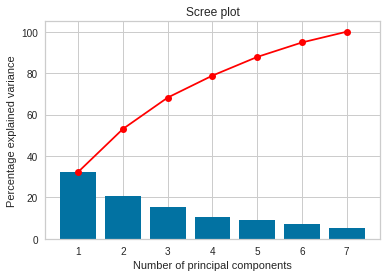

In [72]:
# Scree plot
display_scree_plot(model_pca) 

#### 2.2. Cercles de corrélations

Les 5 premières composantes expriment 82% des variables 

In [73]:
# Nombre de composantes à étudier
num_components = 7
pcs = model_pca.components_ 
pc1 = model_pca.components_[0]
pc2 = model_pca.components_[1]
pc3 = model_pca.components_[2]
pc4 = model_pca.components_[3]
pc5 = model_pca.components_[4]
pc6 = model_pca.components_[5]
pc7 = model_pca.components_[6]

In [74]:
palette = sns.color_palette("bright", 10)

def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    """Display correlation circles, one for each factorial plane"""

    # For each factorial plane
    for d1, d2 in axis_ranks: 
        if d2 < n_comp:

            # Initialise the matplotlib figure
            #fig, ax = plt.subplots(figsize=(8,8))

            # Determine the limits of the chart
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # Add arrows
            # If there are more than 30 arrows, we do not display the triangle at the end
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (see the doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # Display variable names
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # Display circle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # Define the limits of the chart
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # Display grid lines
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # Label the axes, with the percentage of variance explained
            plt.xlabel('PC{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('PC{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Correlation Circle (PC{} and PC{})".format(d1+1, d2+1))
            #plt.show(block=False)
        
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    '''Display a scatter plot on a factorial plane, one for each factorial plane'''

    # For each factorial plane
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # Initialise the matplotlib figure      
            #fig = plt.figure(figsize=(7,6))
        
            # Display the points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # Display the labels on the points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # Define the limits of the chart
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # Display grid lines
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # Label the axes, with the percentage of variance explained
            plt.xlabel('PC{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('PC{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection of points (on PC{} and PC{})".format(d1+1, d2+1))
            #plt.show(block=False)

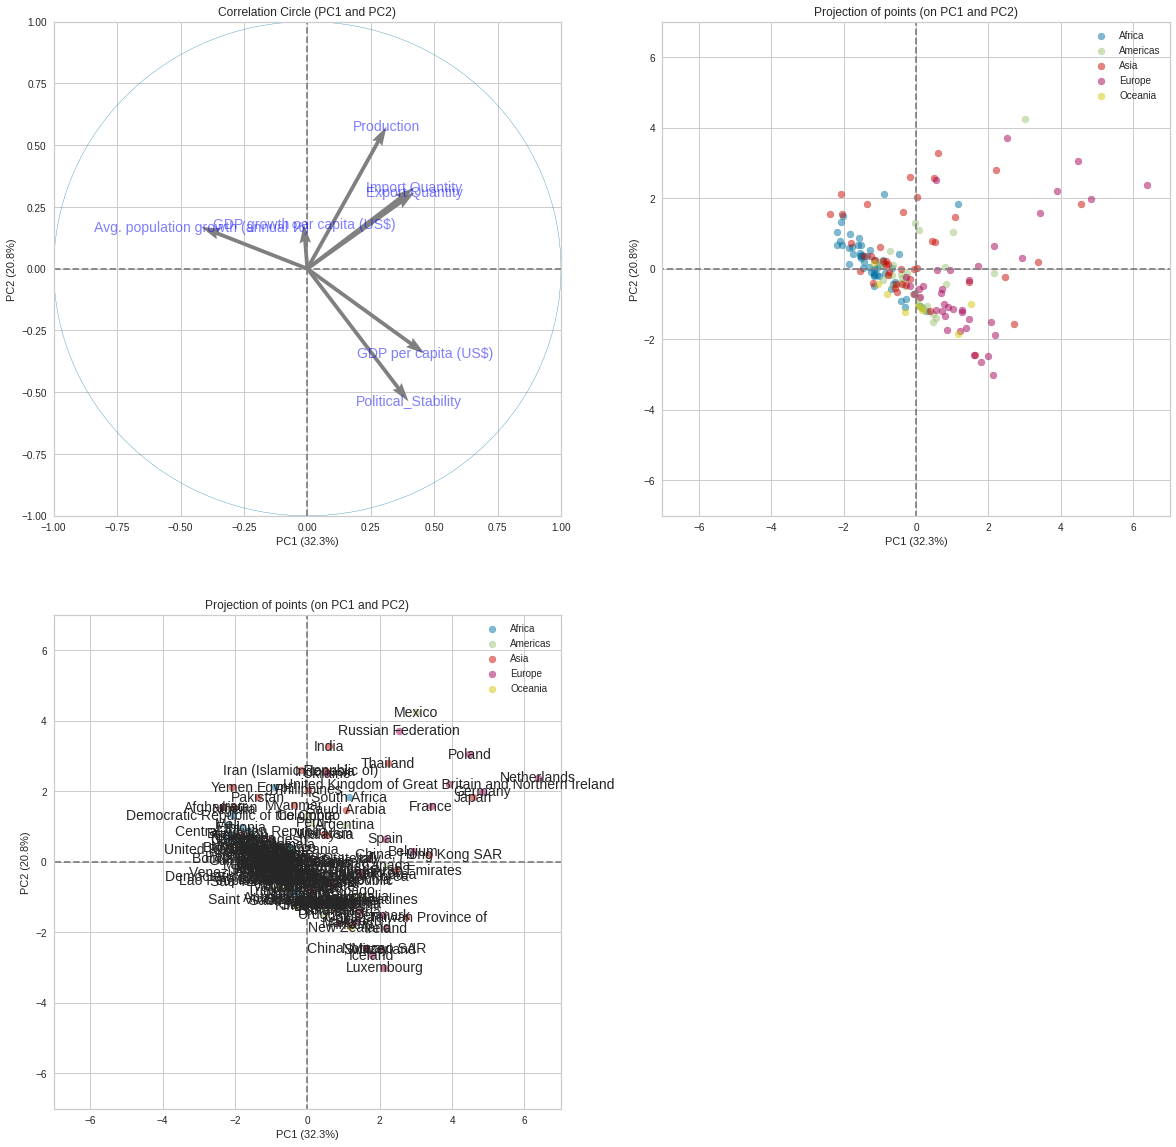

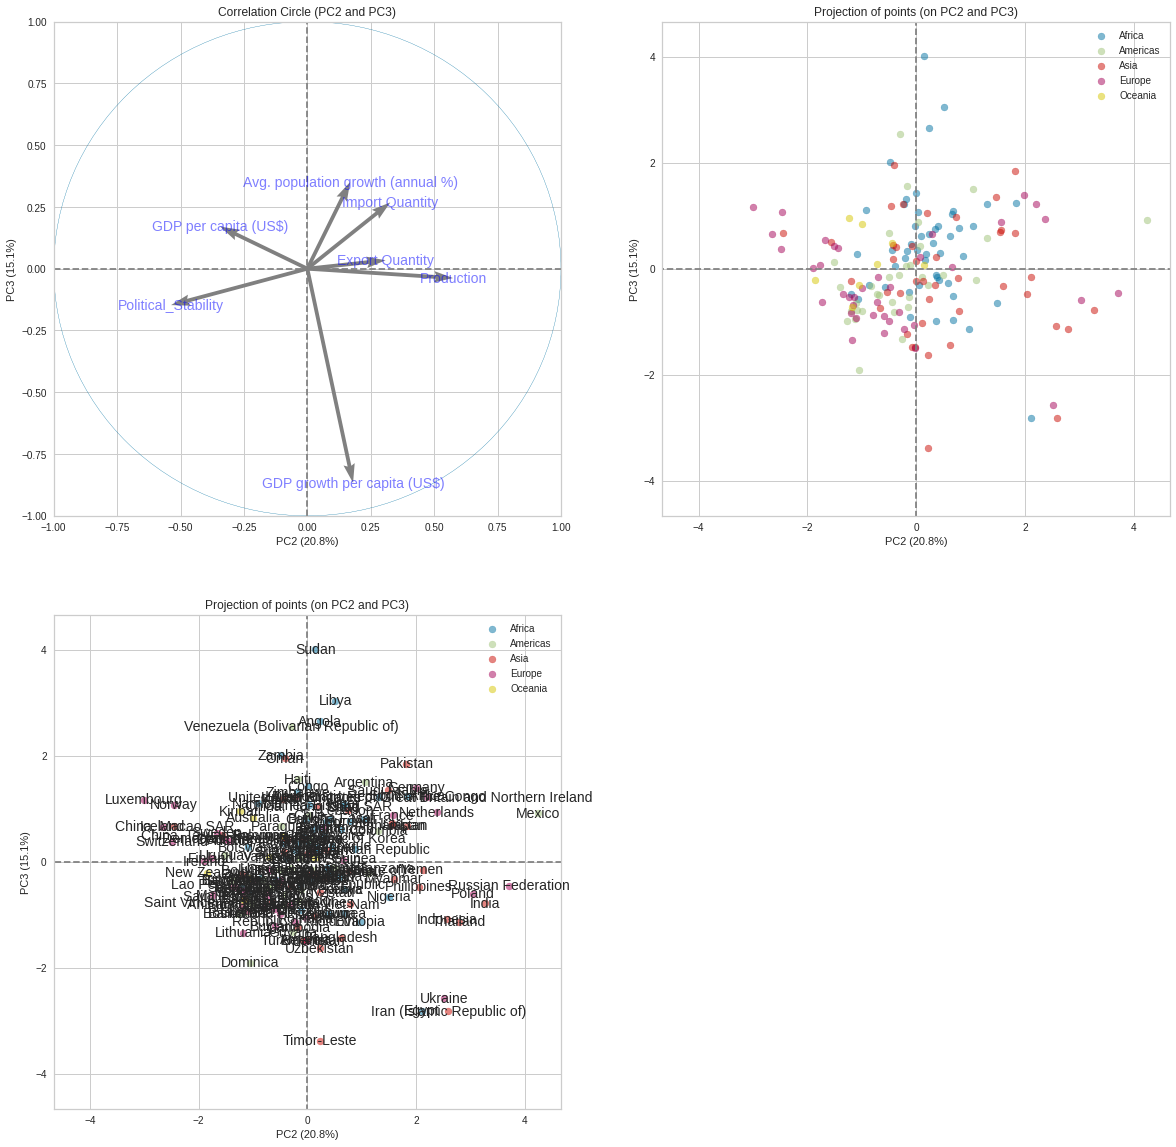

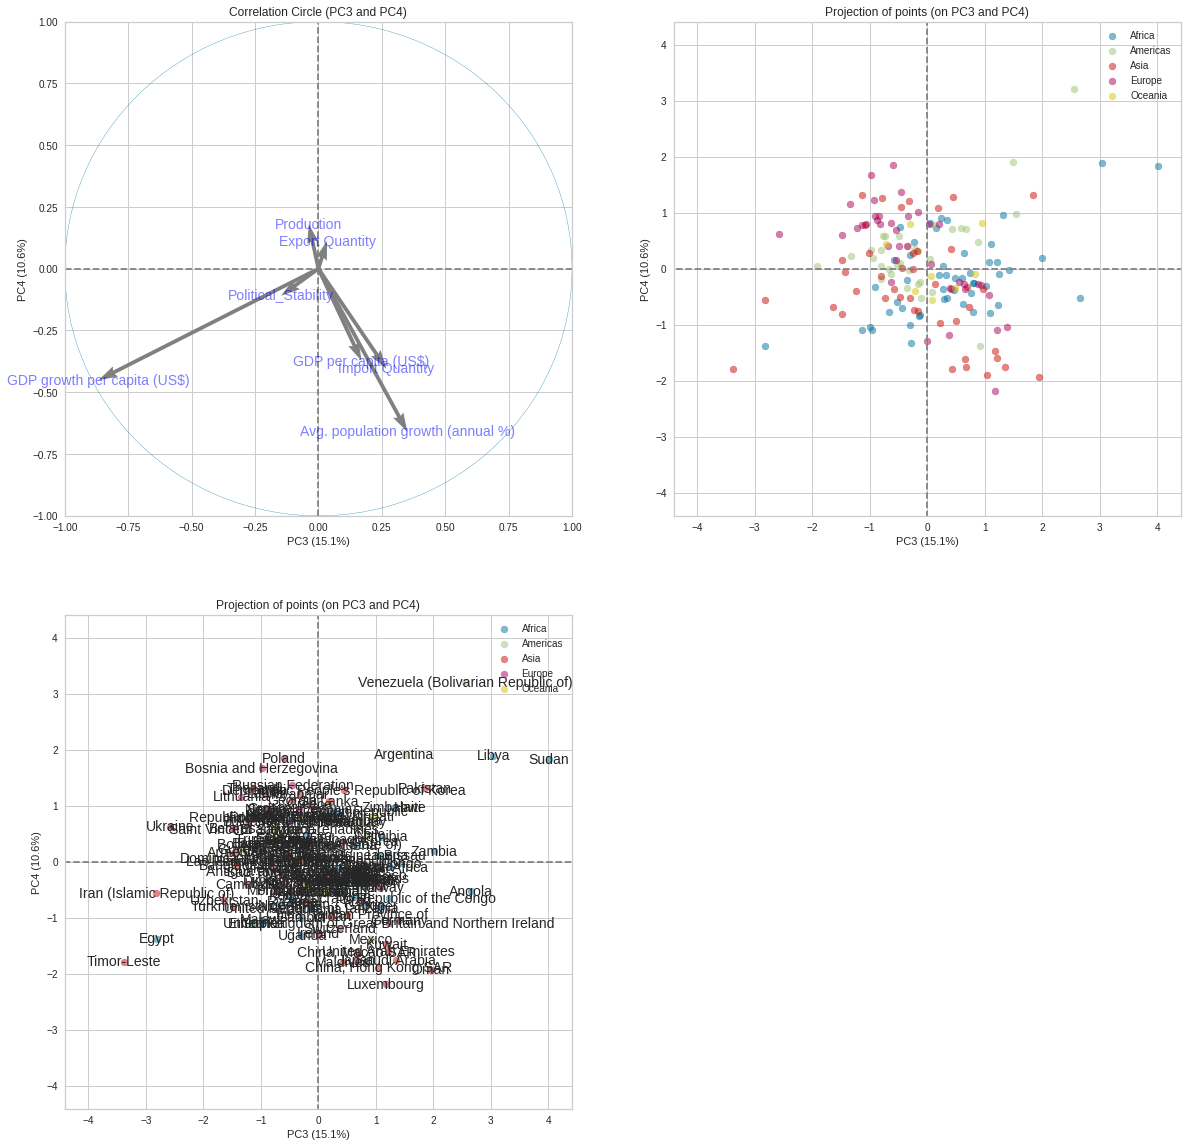

In [75]:
# Prenez une copie des données et ajoutez une nouvelle colonne pour le baguage. (top import)
classed_data = data.copy()
#append_class(classed_data, 'rank_band','Top Consumption',[0,11,101,180],['Top 10','Top 100','Top 180'])

# Obtenez une liste des nouvelles bandes que nous pouvons passer au plot.
#classed_data = classed_data.reset_index()
rank_band = [classed_data.loc[country_id, "Region"] for country_id in classed_data.index]

X_projected = model_pca.transform(X_scaled)

plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
display_circles(pcs, num_components, model_pca, [(0,1)], labels = np.array(X.columns))
plt.subplot(2,2,2)
display_factorial_planes(X_projected, num_components, model_pca, [(0,1)], illustrative_var = rank_band, alpha = 0.5)
plt.subplot(2,2,3)
display_factorial_planes(X_projected, num_components, model_pca, [(0,1)], illustrative_var = rank_band, alpha = 0.5, labels=classed_data.index)
plt.show()

print("="*100,"\n")
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
display_circles(pcs, num_components, model_pca, [(1,2)], labels = np.array(X.columns))
plt.subplot(2,2,2)
display_factorial_planes(X_projected, num_components, model_pca, [(1,2)], illustrative_var = rank_band, alpha = 0.5)
plt.subplot(2,2,3)
display_factorial_planes(X_projected, num_components, model_pca, [(1,2)], illustrative_var = rank_band, alpha = 0.5, labels=classed_data.index)
plt.show()

print("="*100,"\n")
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
display_circles(pcs, num_components, model_pca, [(2,3)], labels = np.array(X.columns))
plt.subplot(2,2,2)
display_factorial_planes(X_projected, num_components, model_pca, [(2,3)], illustrative_var = rank_band, alpha = 0.5)
plt.subplot(2,2,3)
display_factorial_planes(X_projected, num_components, model_pca, [(2,3)], illustrative_var = rank_band, alpha = 0.5, labels=classed_data.index)
plt.show()


In [76]:
coords = pd.DataFrame(X_projected, index=X.index, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7'])

#### 2.3. Matrices de corrélations

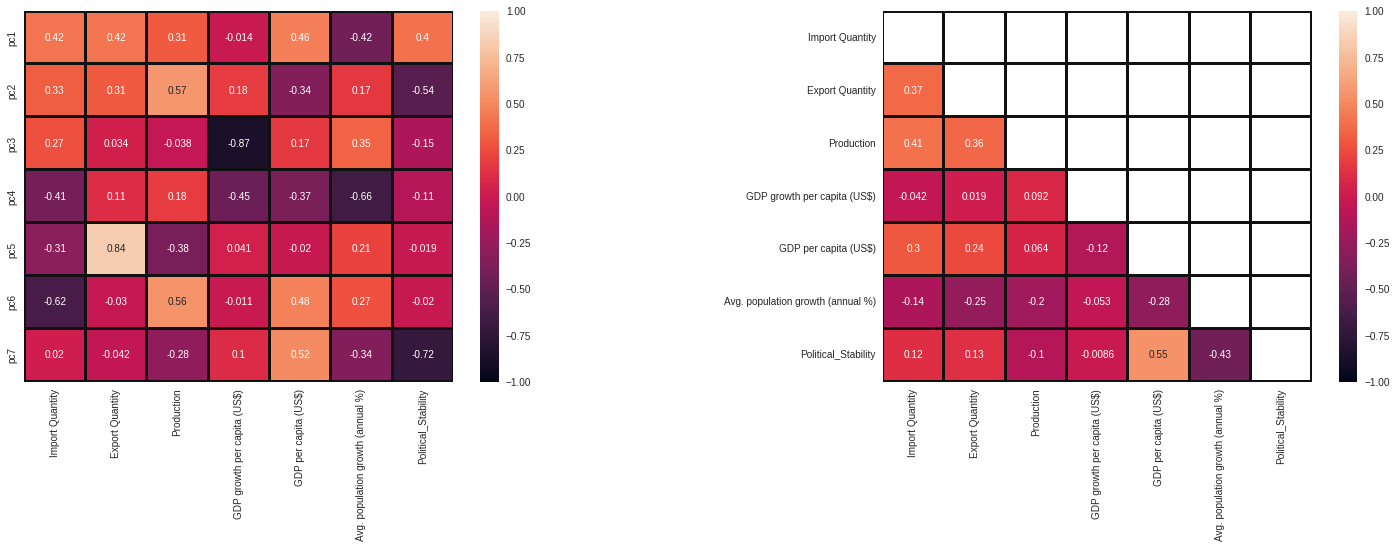

In [77]:
pcs2 = pd.DataFrame(pcs, columns=['Import Quantity', 'Export Quantity', 'Production', 'GDP growth per capita (US$)',
       'GDP per capita (US$)', 'Avg. population growth (annual %)',
       'Political_Stability'])
pcs2.index = ["pc1","pc2","pc3","pc4","pc5","pc6","pc7"]

plt.figure(figsize=(25,15))
plt.subplot(2,2,1)
sns.heatmap(pcs2, annot=True,linecolor='k', linewidths=2,vmin=-1, vmax=1,)
plt.subplot(2,2,2)
mask = np.triu(np.ones_like(X.corr(), dtype=bool))
sns.heatmap(X.corr(), mask=mask, vmin=-1, vmax=1, annot=True,linecolor='k', linewidths=2)
plt.subplots_adjust(wspace=0.6)
plt.show()

**Observations heatmap composantes principales & indicateurs :**   

---



- PC1 : représente le pays stable à PIB plûtot élévé et une faible croissance démographique, forte importation et exportation de vollailes.

- PC2 : Importations et exportations de vollailes plûtot moyennes, une production importante accompagnée d'un PIB par habitant faible et une stabilité politique très dégradée.

- PC3 : Importantes de vollailes et plûtot bonne suivi d'une exportation faible et une production assez basse. La stabilité politique en dessous des standards acceptables.

- PC4 : Mauvaise croissance démographique accompagnée d'un taux d'importation très bas et d'exportation bas. Cluster non intéressant cat tous les indicateurs sont négatifs.

- PC5 : Des importations faibles accompagnées d'exportations très importantes et d'une production faible. 

- PC6 :  Des importations très faibles accompagnées d'exportations peu importantes et d'une production forte. Un PIB par habitant important   

- PC7 :  Des importations faibles accompagnées d'exportations peu importantes et d'une production faible. Un PIB par habitant important, une croissance démographique faible et d'une stabilité politique médiocre.    





**Observations heatmap de corrélations entre les composantes principales :** 

---
- Forte corrélation entre la stabilité politique et le PIB par habitant.

- Très faible corrélation entre la stabilité politique et la croissance démographique.

- Forte corrélation entre la production et l'importation - exportation


### **3 - Clustering**
*Le clustering est une discipline particulière du Machine Learning ayant pour objectif de séparer vos données en groupes homogènes ayant des caractéristiques communes.*

----

#### 3.1. Recherche du nombre optimal de cluster pour classification

##### Methode du coude
*La méthode du coude est l’une des méthodes les plus populaires pour déterminer cette valeur optimale de k.*

In [78]:
!pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


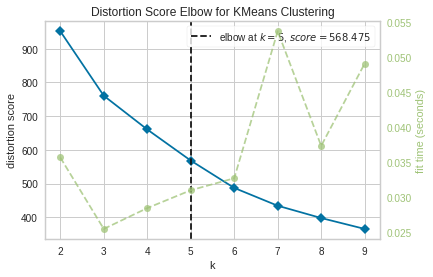

In [79]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
model = KMeans(init='k-means++')
visualizer = KElbowVisualizer(model, k=(2,10),metric="distortion") 
visualizer.fit(X_scaled)
visualizer.show()

Selon la courbe d'elbow, le nombre optimal de clusters est 5.

##### Silhouette score
---

- La valeur du score de la silhouette se situe entre -1 et 1.

- Un score proche de 1 indique que le point de données est très similaire aux autres points de données de la grappe,

- Un score proche de -1 indique que le point de données n'est pas similaire aux points de données de son cluster.

In [80]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
range_n_clusters = list (range(2,10))
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.37276363894071873)
For n_clusters = 3, silhouette score is 0.24557089076890046)
For n_clusters = 4, silhouette score is 0.24320977023710372)
For n_clusters = 5, silhouette score is 0.2732296958143728)
For n_clusters = 6, silhouette score is 0.28259397183540425)
For n_clusters = 7, silhouette score is 0.2546433265596982)
For n_clusters = 8, silhouette score is 0.24647789646097526)
For n_clusters = 9, silhouette score is 0.25650377914399203)


Selon le score de silhouhette, le nombre optimal de cluster est soit 6, suivi de 8.



#### 3.2. Classification Ascendante Hiérarchique (CAH)

In [81]:
# Import the hierarchical clustering algorithm
from sklearn.cluster import AgglomerativeClustering

# Create a hierarchical clustering model
hiercluster = AgglomerativeClustering(affinity='euclidean', linkage='ward', compute_full_tree=True) 

# Fit the data to the model and determine which clusters each data point belongs to:
hiercluster.set_params(n_clusters=5)
clusters = hiercluster.fit_predict(X_scaled) 
np.bincount(clusters) # count of data points in each cluster

array([51, 93,  8, 17,  3])

In [82]:
# Add the cluster number to the original scaled data
X_clustered = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)
X_clustered["cluster"] = clusters

In [83]:
X_clustered.tail(10).round(2)

,Import Quantity,Export Quantity,Production,GDP growth per capita (US$),GDP per capita (US$),Avg. population growth (annual %),Political_Stability,cluster
Area,,,,,,,,
United Kingdom of Great Britain and Northern Ireland,3.90,1.77,1.86,-0.21,1.37,-0.58,0.16,2
United Republic of Tanzania,-0.44,-0.29,-0.42,0.56,-0.65,1.43,-0.50,1
Uruguay,-0.44,-0.28,-0.48,-0.79,0.16,-0.84,1.23,0
Uzbekistan,-0.36,-0.29,-0.44,1.79,-0.62,0.25,-0.20,1
Vanuatu,-0.45,-0.29,-0.52,-0.06,-0.55,1.11,1.01,1
Venezuela (Bolivarian Republic of),-0.47,-0.29,0.02,-3.63,-0.45,-1.65,-1.34,1
Viet Nam,0.64,-0.09,0.84,0.80,-0.57,-0.27,0.32,3
Yemen,0.29,-0.29,-0.28,1.08,-0.66,1.00,-3.13,1
Zambia,-0.35,-0.24,-0.46,-1.99,-0.64,1.45,0.25,1


In [84]:
X_clustered.to_csv("/content/drive/MyDrive/Colab Notebooks/P9/P9 _ Docs finals/data_clusters.csv")

#### 3.3. Classification descendante hiérarchique - Dendrogramme

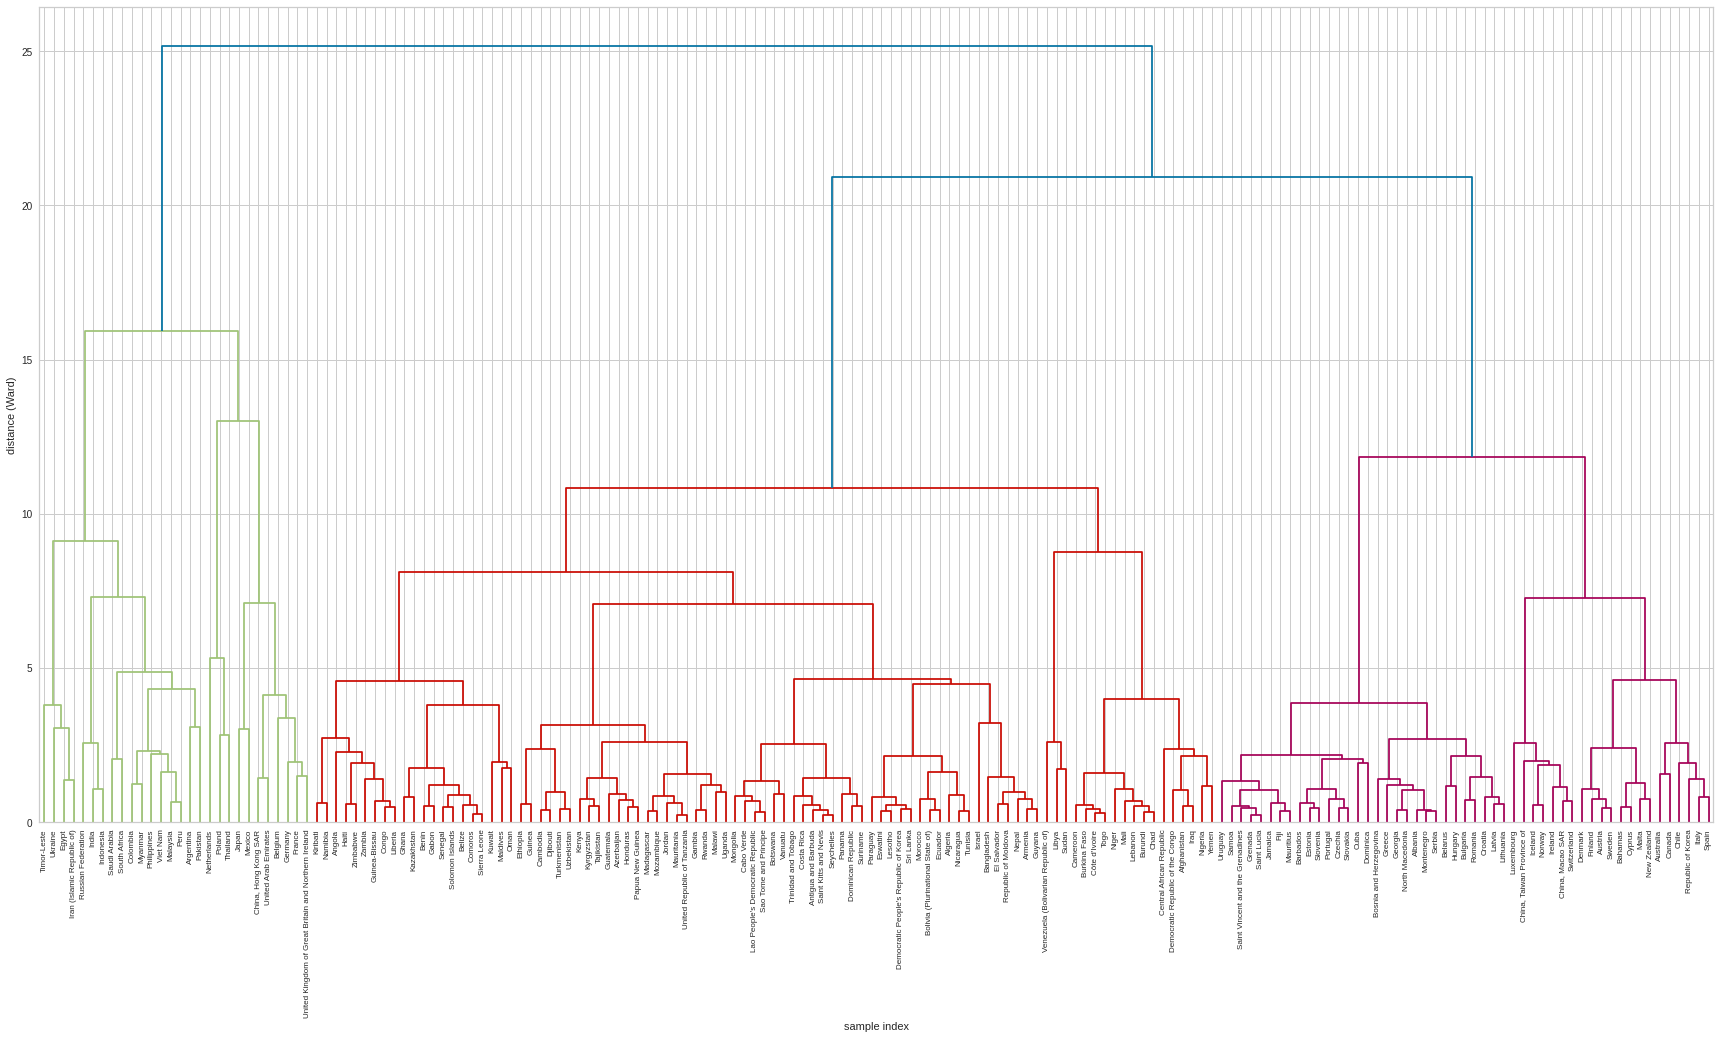

In [85]:
# Montrer un dendrogramme, juste pour le plus petit groupe.
from scipy.cluster.hierarchy import linkage, fcluster 
sample = X_clustered
Z = linkage(sample, 'ward') # Calculate the distance between each sample
names = sample.index
plt.figure(figsize=(30,15))
labelsize=25
ticksize=15
plt.xlabel('sample index')
plt.ylabel('distance (Ward)')
dendrogram(Z, leaf_rotation=90, leaf_font_size=8, labels = names) # Plot with Custom leaves
plt.show()

Observations :    


#### 3.4. Plan factoriel

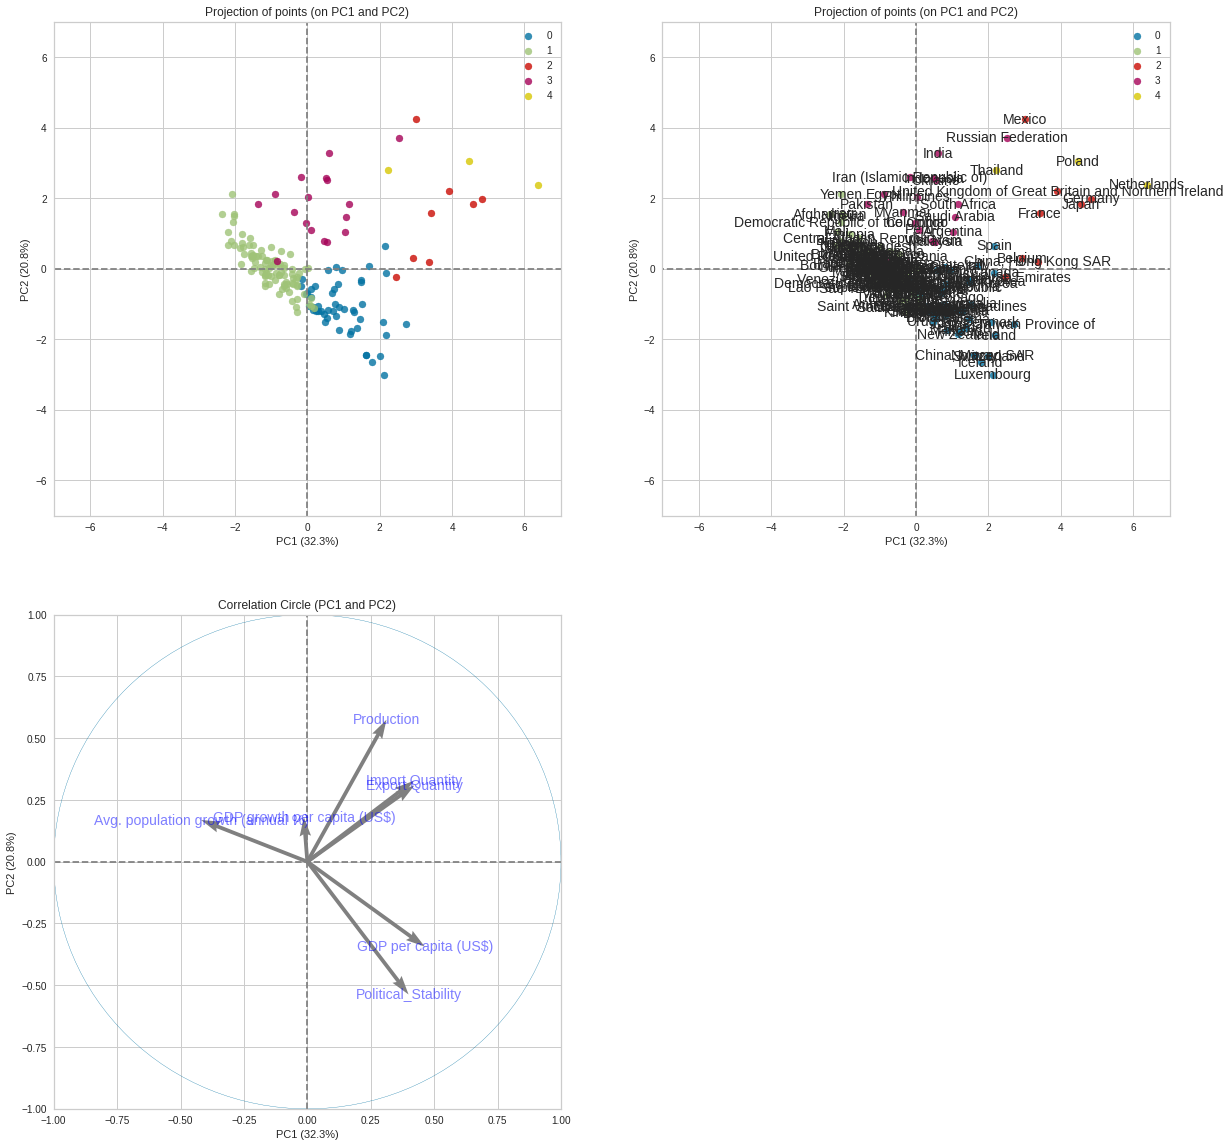

In [86]:
print("="*100,"\n")
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
display_factorial_planes(X_reduced, 2, model_pca, [(0,1)], illustrative_var = clusters, alpha = 0.8)
plt.subplot(2,2,2)
display_factorial_planes(X_reduced, 2, model_pca, [(0,1)], illustrative_var = clusters, alpha = 0.8, labels=classed_data.index)
#X_clustered.boxplot(by="cluster", figsize=(15,10), layout=(2,5))
plt.subplot(2,2,3)
display_circles(pcs, num_components, model_pca, [(0,1)], labels = np.array(X.columns))

##### Analyse des centroïds

In [87]:
def addAlpha(colour, alpha):
    '''Add an alpha to the RGB colour'''
    
    return (colour[0],colour[1],colour[2],alpha)

def display_parallel_coordinates(df, num_clusters):
    '''Display a parallel coordinates plot for the clusters in df'''

    # Select data points for individual clusters
    cluster_points = []
    for i in range(num_clusters):
        cluster_points.append(df[df.cluster==i])
    
    # Create the plot
    fig = plt.figure(figsize=(12, 15))
    title = fig.suptitle("Parallel Coordinates Plot for the Clusters", fontsize=18)
    fig.subplots_adjust(top=0.95, wspace=0)

    # Display one plot for each cluster, with the lines for the main cluster appearing over the lines for the other clusters
    for i in range(num_clusters):    
        plt.subplot(num_clusters, 1, i+1)
        for j,c in enumerate(cluster_points): 
            if i!= j:
                pc = parallel_coordinates(c, 'cluster', color=[addAlpha(palette[j],0.2)])
        pc = parallel_coordinates(cluster_points[i], 'cluster', color=[addAlpha(palette[i],0.5)])

        # Stagger the axes
        ax=plt.gca()
        for tick in ax.xaxis.get_major_ticks()[1::2]:
            tick.set_pad(20)        


def display_parallel_coordinates_centroids(df, num_clusters):
    '''Display a parallel coordinates plot for the centroids in df'''

    # Create the plot
    fig = plt.figure(figsize=(12, 5))
    title = fig.suptitle("Tracé des coordonnées parallèles pour les centroïdes", fontsize=18)
    fig.subplots_adjust(top=0.9, wspace=0)

    # Draw the chart
    parallel_coordinates(df, 'cluster', color=palette)

    # Stagger the axes
    ax=plt.gca()
    for tick in ax.xaxis.get_major_ticks()[1::2]:
        tick.set_pad(20)

,Import Quantity,Export Quantity,Production,GDP growth per capita (US$),GDP per capita (US$),Avg. population growth (annual %),Political_Stability
cluster,,,,,,,
0,-0.147768,-0.069289,-0.209435,-0.049977,0.777634,-0.900540,0.891198
1,-0.309486,-0.286961,-0.404968,-0.092179,-0.476997,0.589806,-0.424159
2,3.686466,1.341504,1.268346,-0.118526,1.235031,-0.629771,0.531675
3,0.261511,0.022939,1.943307,0.644483,-0.400341,-0.053089,-0.665125
4,0.793648,6.366378,1.720091,0.371148,0.542315,-0.994590,0.349813


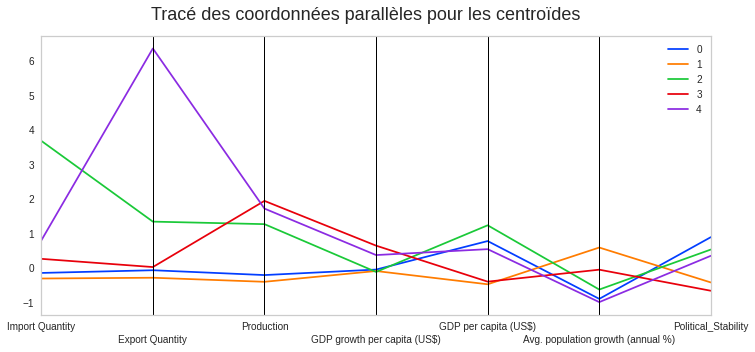

In [88]:
cah_ =  X_clustered.groupby(by="cluster").mean()
display(cah_)
display_parallel_coordinates_centroids(cah_.reset_index(), 5)

**Cluster 0 : représente les pays plutôt stables (moyennement stable) à PIB moyen mais une bonne croissance économique et une faible croissance démographique. Ce cluster et composé de certains pays d'Afrique et d'Asie**.

**Cluster 1 : représente les pays instables à PIB bas avec une croissance économique moyenne et une forte croissance démographique**.

**Cluster 2 : représente les pays stable avec un bon PIB, une croissance économique moyenne et grands importateurs **.

**Cluster 3 : représente les pays faibles importateurs de volailles, PIB plutôt bas et stabilité politique légèrement en dessous de la moyenne**.

**Cluster 4 : représente les pays très stables à PIB élévés avec une forte quantité de volailies exportées.**

In [89]:
X_clustered.round(2)

,Import Quantity,Export Quantity,Production,GDP growth per capita (US$),GDP per capita (US$),Avg. population growth (annual %),Political_Stability,cluster
Area,,,,,,,,
Afghanistan,-0.23,-0.29,-0.49,0.02,-0.68,1.29,-2.86,1
Albania,-0.35,-0.29,-0.51,0.22,-0.45,-1.27,0.51,0
Algeria,-0.47,-0.29,-0.16,-0.63,-0.51,0.60,-0.75,1
Angola,1.05,-0.29,-0.46,-2.09,-0.57,1.77,-0.24,1
Antigua and Barbuda,-0.44,-0.29,-0.52,0.57,0.14,-0.28,0.89,1
...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),-0.47,-0.29,0.02,-3.63,-0.45,-1.65,-1.34,1
Viet Nam,0.64,-0.09,0.84,0.80,-0.57,-0.27,0.32,3
Yemen,0.29,-0.29,-0.28,1.08,-0.66,1.00,-3.13,1


#### 3.5. Composition des clusters

In [90]:
print("="*150,"\n")
print("\033[1m"+"Les {f} pays du cluster 0 :".format(f =len(X_clustered[X_clustered["cluster"]==0]))+"\033[0;0m","\n")
print(X_clustered[X_clustered["cluster"]==0].index.tolist(),"\n")

print("="*150,"\n")
print("\033[1m"+"Les {f} pays du cluster 1 :".format(f =len(X_clustered[X_clustered["cluster"]==1]))+"\033[0;0m","\n")
print(X_clustered[X_clustered["cluster"]==1].index.tolist(),"\n")

print("="*150,"\n")
print("\033[1m"+"Les {f} pays du cluster 2 :".format(f =len(X_clustered[X_clustered["cluster"]==2]))+"\033[0;0m","\n")
print(X_clustered[X_clustered["cluster"]==2].index.tolist(),"\n")

print("="*150,"\n")
print("\033[1m"+"Les {f} pays du cluster 3 :".format(f =len(X_clustered[X_clustered["cluster"]==3]))+"\033[0;0m","\n")
print(X_clustered[X_clustered["cluster"]==3].index.tolist(),"\n")

print("="*150,"\n")
print("\033[1m"+"Les {f} pays du cluster 4 :".format(f =len(X_clustered[X_clustered["cluster"]==4]))+"\033[0;0m","\n")
print(X_clustered[X_clustered["cluster"]==4].index.tolist(),"\n")
print("="*150,"\n")


Les 51 pays du cluster 0 : 

['Albania', 'Australia', 'Austria', 'Bahamas', 'Barbados', 'Belarus', 'Bosnia and Herzegovina', 'Bulgaria', 'Canada', 'Chile', 'China, Macao SAR', 'China, Taiwan Province of', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Dominica', 'Estonia', 'Fiji', 'Finland', 'Georgia', 'Greece', 'Grenada', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Jamaica', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Mauritius', 'Montenegro', 'New Zealand', 'North Macedonia', 'Norway', 'Portugal', 'Republic of Korea', 'Romania', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Samoa', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Uruguay'] 


Les 93 pays du cluster 1 : 

['Afghanistan', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Armenia', 'Azerbaijan', 'Bangladesh', 'Belize', 'Benin', 'Bolivia (Plurinational State of)', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo

#### 3.6. Conclusion CAH

Les pays du cluster 2 présentent les meilleurs caractéristiques pour une internationalisation. En effet, ces pays affichent une bonne stabilité politique de manière globale, un pib par habitant élévé pour certains et pour finir ce sont les plus gros importateurs de volailles.

Le cluster 0 vient en 2e position Les pays de ce groupe affichent un PIB moyen et une bonne croissance économique.

### **4 - K-means**
*Le k-means est un algorithme itératif qui minimise la somme des distances entre chaque individu et le centroïd.*

---

In [91]:
model_kmeans = KMeans(n_clusters=5)
model_kmeans.fit(X_scaled)

# Determine which clusters each data point belongs to:
clusters2 =  model_kmeans.fit_predict(X_scaled)

# Add the cluster number to the original scaled data
X_clustered2 = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)
X_clustered2["cluster"] = clusters2

X_clustered2.head().round(4)

,Import Quantity,Export Quantity,Production,GDP growth per capita (US$),GDP per capita (US$),Avg. population growth (annual %),Political_Stability,cluster
Area,,,,,,,,
Afghanistan,-0.2324,-0.2930,-0.4857,0.0222,-0.6820,1.2895,-2.8617,0
Albania,-0.3529,-0.2930,-0.5057,0.2181,-0.4456,-1.2653,0.5115,3
Algeria,-0.4734,-0.2877,-0.1564,-0.6273,-0.5124,0.6043,-0.7494,0
Angola,1.0492,-0.2930,-0.4594,-2.0857,-0.5692,1.7717,-0.2429,0
Antigua and Barbuda,-0.4350,-0.2930,-0.5207,0.5732,0.1410,-0.2755,0.8887,3


In [92]:
# Convert to a data frame
X_reduceddf = pd.DataFrame(X_reduced, index=X.index, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7'])
X_reduceddf['cluster'] = clusters2
X_reduceddf.head().round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,cluster
Area,,,,,,,,
Afghanistan,-2.3705,1.5480,0.6847,-0.3199,0.3558,-0.0370,1.4067,0
Albania,0.0955,-0.7924,-0.8697,0.8664,-0.2079,-0.6225,0.0026,3
Algeria,-1.1492,0.2341,0.6482,0.2885,0.0915,0.1576,0.0461,0
Angola,-0.9007,0.2378,2.6576,-0.5314,-0.0828,-0.6614,-0.7827,0
Antigua and Barbuda,0.0589,-1.0010,-0.8075,-0.1769,0.0308,-0.0439,-0.2623,3


In [93]:
X_reduceddf.to_csv("/content/drive/MyDrive/Colab Notebooks/P9/P9 _ Docs finals/data_kmeans.csv")

#### 4.1. Plan factoriel

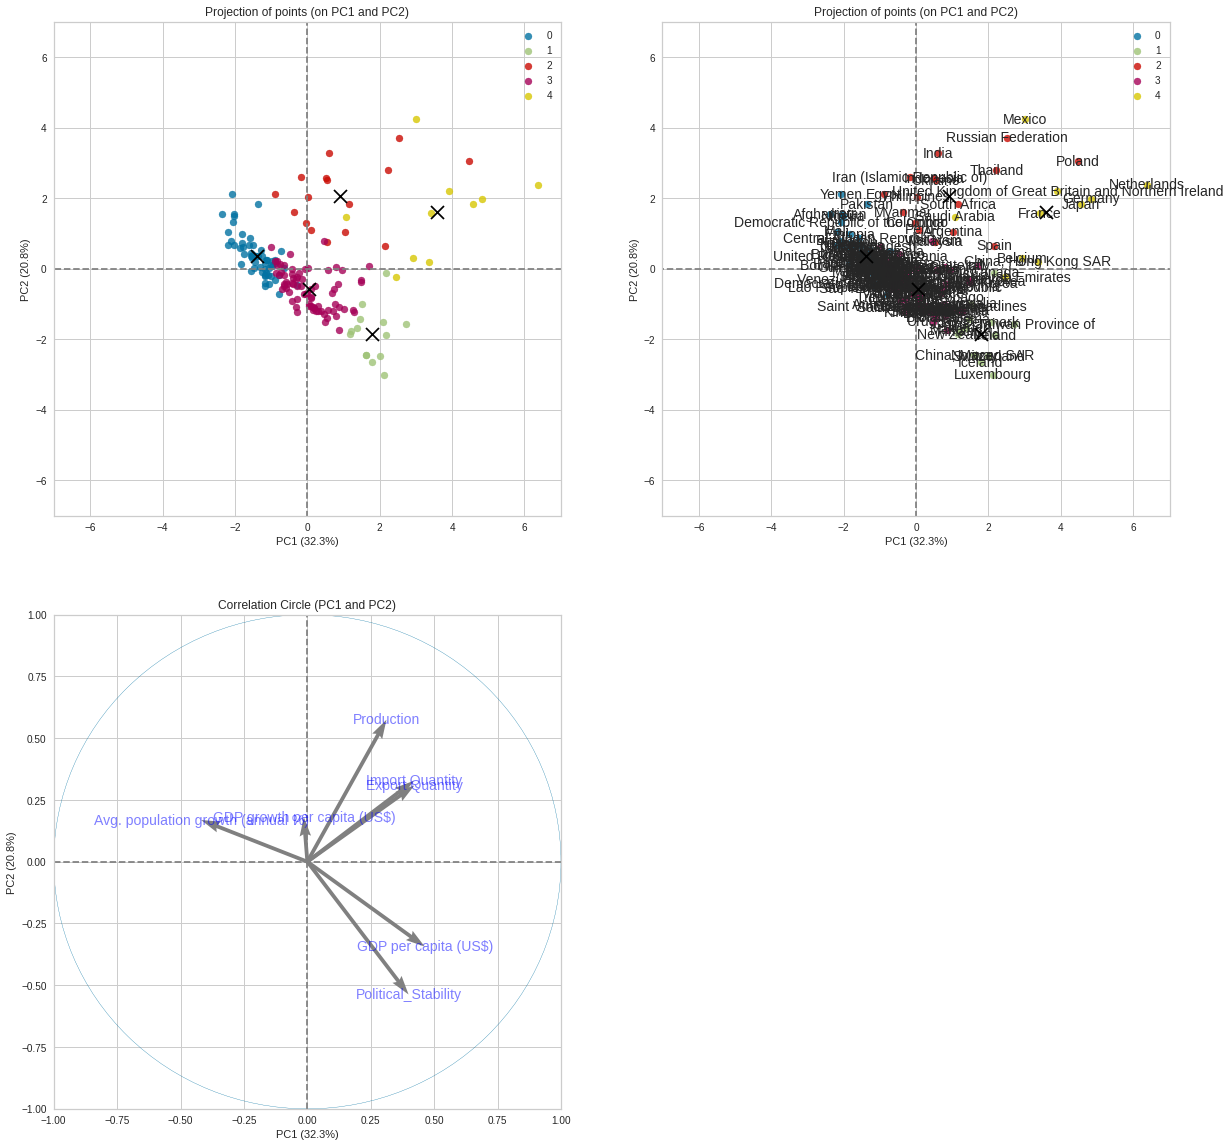

In [94]:
centres_reduced = model_pca.transform(model_kmeans.cluster_centers_)
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
display_factorial_planes(X_reduced, 2, model_pca, [(0,1)], illustrative_var = clusters2, alpha = 0.8)
plt.scatter(centres_reduced[:, 0], centres_reduced[:, 1],
            marker='x', s=169, linewidths=3,
            color='black', zorder=10)
plt.subplot(2,2,2)
display_factorial_planes(X_reduced, 2, model_pca, [(0,1)], illustrative_var = clusters2, alpha = 0.8, labels=classed_data.index)
plt.scatter(centres_reduced[:, 0], centres_reduced[:, 1],
            marker='x', s=169, linewidths=3,
            color='black', zorder=10)
plt.subplot(2,2,3)
display_circles(pcs, num_components, model_pca, [(0,1)], labels = np.array(X.columns))

plt.show()

##### Analyse des centroïdes

,Import Quantity,Export Quantity,Production,GDP growth per capita (US$),GDP per capita (US$),Avg. population growth (annual %),Political_Stability
cluster,,,,,,,
0,-0.263912,-0.286900,-0.405657,-0.258434,-0.563091,1.092253,-0.806538
1,-0.102118,-0.062520,-0.099232,-0.413953,2.635495,-0.337765,1.305116
2,0.107528,0.844809,2.296941,0.578100,-0.305707,-0.366467,-0.554106
3,-0.275335,-0.195775,-0.315246,0.166303,-0.161350,-0.620451,0.423097
4,3.540228,1.839479,1.140413,-0.119625,1.219187,-0.513240,0.483448


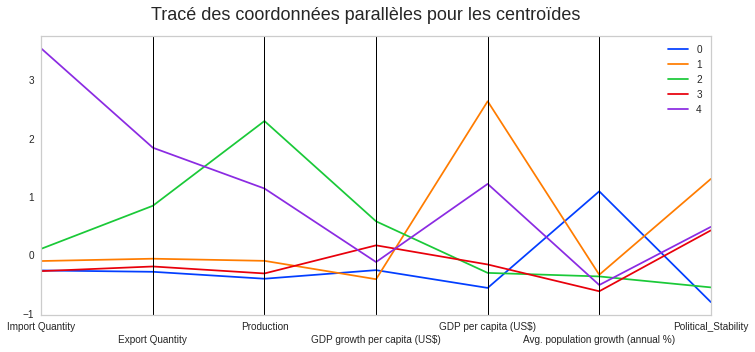

In [95]:

kmeans_ =  X_clustered2.groupby(by="cluster").mean()
display(kmeans_)
display_parallel_coordinates_centroids(kmeans_.reset_index(), 5)

#### 4.2. Composition des clusters

In [96]:
print("="*150,"\n")
print("\033[1m"+"Les {f} pays du cluster 0 :".format(f =len(X_clustered2[X_clustered2["cluster"]==0]))+"\033[0;0m","\n")
print(X_clustered2[X_clustered2["cluster"]==0].index.tolist(),"\n")

print("="*150,"\n")
print("\033[1m"+"Les {f} pays du cluster 1 :".format(f =len(X_clustered2[X_clustered2["cluster"]==1]))+"\033[0;0m","\n")
print(X_clustered2[X_clustered2["cluster"]==1].index.tolist(),"\n")

print("="*150,"\n")
print("\033[1m"+"Les {f} pays du cluster 2 :".format(f =len(X_clustered2[X_clustered2["cluster"]==2]))+"\033[0;0m","\n")
print(X_clustered2[X_clustered2["cluster"]==2].index.tolist(),"\n")

print("="*150,"\n")
print("\033[1m"+"Les {f} pays du cluster 3 :".format(f =len(X_clustered2[X_clustered2["cluster"]==3]))+"\033[0;0m","\n")
print(X_clustered2[X_clustered2["cluster"]==3].index.tolist(),"\n")

print("="*150,"\n")
print("\033[1m"+"Les {f} pays du cluster 4 :".format(f =len(X_clustered2[X_clustered2["cluster"]==4]))+"\033[0;0m","\n")
print(X_clustered2[X_clustered2["cluster"]==4].index.tolist(),"\n")
print("="*150,"\n")


Les 57 pays du cluster 0 : 

['Afghanistan', 'Algeria', 'Angola', 'Belize', 'Benin', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo', "Côte d'Ivoire", 'Democratic Republic of the Congo', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Honduras', 'Iraq', 'Jordan', 'Kenya', 'Kuwait', 'Kyrgyzstan', 'Lebanon', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Maldives', 'Mali', 'Mauritania', 'Mozambique', 'Nicaragua', 'Niger', 'Nigeria', 'Oman', 'Pakistan', 'Papua New Guinea', 'Rwanda', 'Senegal', 'Sierra Leone', 'Solomon Islands', 'Sudan', 'Tajikistan', 'Togo', 'Tunisia', 'Uganda', 'United Republic of Tanzania', 'Vanuatu', 'Yemen', 'Zambia', 'Zimbabwe'] 


Les 14 pays du cluster 1 : 

['Australia', 'Austria', 'Canada', 'China, Macao SAR', 'China, Taiwan Province of', 'Denmark', 'Finland', 'Iceland', 'Ireland', 'Luxembourg', 'New Zealand', 'Norway', 'Sweden', 'Switzerland'] 


Les 16 pays du cluster 2 : 

[

#### 4.3. Conclusion K-means

Les pays du cluster 4 présentent les meilleurs caractéristiques pour une internationalisation. En effet, ces pays affichent une bonne stabilité politique de manière globale, un PIB par habitant élevé pour certains et pour finir ce sont les plus gros importateurs de volailles.

Le cluster 1 vient en 2e position Les pays de ce groupe affichent un bon PIB, une bonne stabilité politique et des importations faibles, ces pays peuvent être des clients intéressants (étude de marche à faire) .

Le cluster 3 présente des pays aux caractéristiques moyennes mais avec une bonne stabilité politique.

### **5 - Comparaison des méthodes CAH et K-means**
---

In [97]:
cah2 = pd.pivot_table(X_clustered, index="cluster", aggfunc="count").reset_index()
cah2.rename(columns={"Import Quantity":"Nombre_pays (CAH)"}, inplace= True)
kmeans2 = pd.pivot_table(X_clustered2, index="cluster", aggfunc="count").reset_index()
kmeans2.rename(columns={"Import Quantity":"Nombre_pays (Kmeans)"},inplace= True)
pays_x_clusters = cah2[["cluster", "Nombre_pays (CAH)"]].merge(kmeans2[["cluster", "Nombre_pays (Kmeans)"]], on="cluster").set_index("cluster")
pays_x_clusters 

,Nombre_pays (CAH),Nombre_pays (Kmeans)
cluster,,
0,51,57
1,93,14
2,8,16
3,17,75
4,3,10


<Figure size 1440x1080 with 0 Axes>

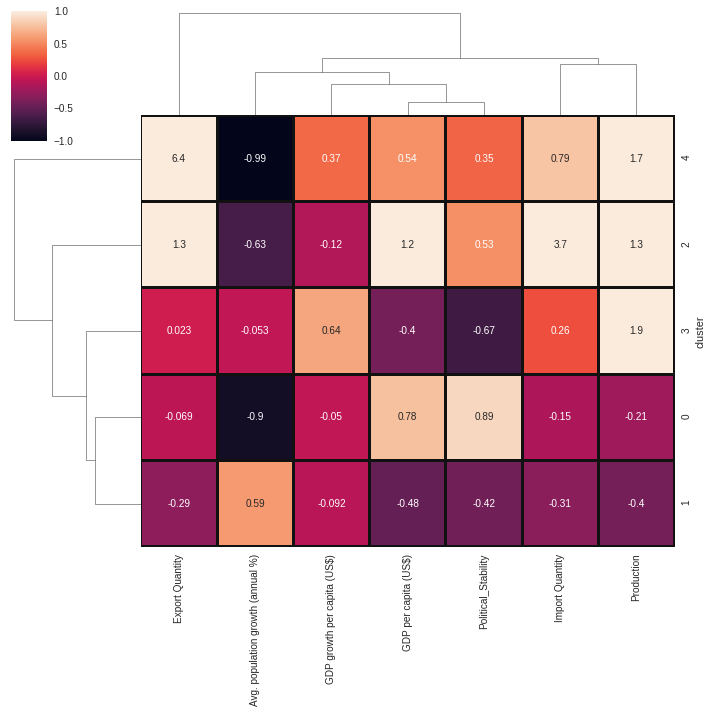

In [98]:
# Heatmap méthode CAH
plt.figure(figsize=(20,15))
sns.clustermap(cah_, annot=True,linecolor='k', linewidths=2,vmin=-1, vmax=1,)
plt.show()

<Figure size 1440x1080 with 0 Axes>

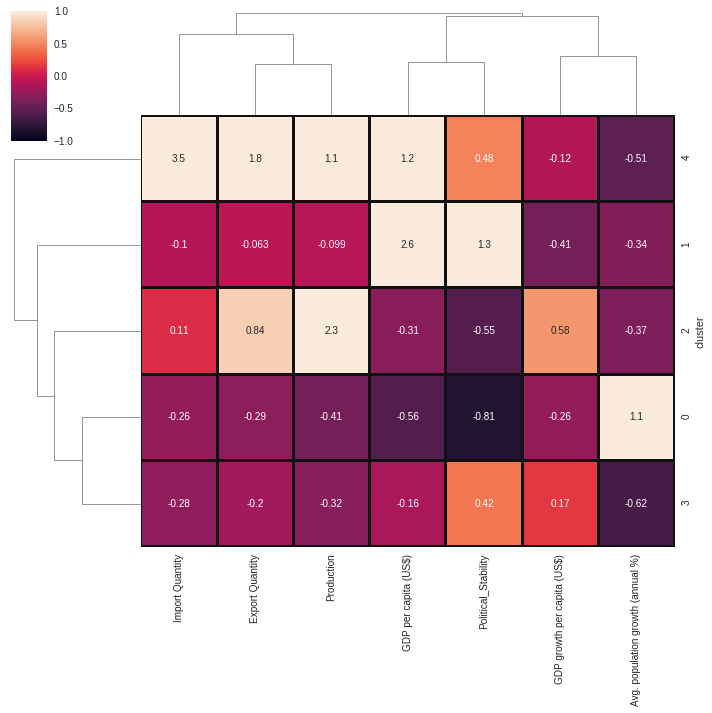

In [99]:
# Heatmap méthode K-means
plt.figure(figsize=(20,15))
sns.clustermap(kmeans_, annot=True,linecolor='k', linewidths=2,vmin=-1, vmax=1,)
plt.show()

Selon la méthode sélectionnée les clusters ont des caractéristiques et tailles.



### **6 - Recommandations**
---

Afin de minimiser les risques liés à l'internationalisation, nous recommandations pour cettte première phase de tenir compte de la proximité par rapport à la France ainsi que des bénéfices que nous offre le marché intérieur.
Pour cette première phase, une internationalisation au sein de l'Union Européenne serait plus avantageux car on bénéficiera des avantages douaniers.

Je propose 4 pays de l'Union Européenne parmi les clusters que nous avons recommandé suite à la classification *(Belgique, France, Allemagne, Pays-Bas)*.

#### 6.1.Top 10 CAH


In [100]:
data["cluster_CAH"] = clusters
data["cluster_kmeans"] = clusters2
top10_cah = data[data["cluster_CAH"].isin([2,0])][data[data["cluster_CAH"].isin([2,0])]["Region"]=="Europe"].sort_values(by="Union european", ascending=False).head(10).sort_values(by="Import Quantity",ascending=False)
top10_cah

,Import Quantity,Export Quantity,Production,GDP growth per capita (US$),GDP per capita (US$),Avg. population growth (annual %),Political_Stability,Region,Union european,cluster_CAH,cluster_kmeans
Area,,,,,,,,,,,
Romania,130.0,93.0,507.0,4.245233,12903.993529,-0.63,0.06,Europe,1,0,3
Austria,113.0,87.0,132.0,-2.926932,49693.668783,0.77,0.92,Europe,1,0,1
Slovakia,104.0,39.0,71.0,-0.384017,19293.407518,0.12,0.75,Europe,1,0,3
Ireland,95.0,97.0,154.0,2.302239,81745.514055,0.87,1.03,Europe,1,0,1
Italy,94.0,180.0,1358.0,-3.823551,33185.489321,0.15,0.31,Europe,1,0,3
Lithuania,49.0,62.0,100.0,3.296197,19820.569598,-1.42,0.75,Europe,1,0,3
Latvia,48.0,20.0,35.0,0.785689,17993.397026,-1.17,0.42,Europe,1,0,3
Slovenia,23.0,33.0,70.0,-0.011094,26064.403987,0.14,0.91,Europe,1,0,3
Luxembourg,12.0,1.0,0.0,-3.364702,114004.238058,2.18,1.37,Europe,1,0,1


#### 6.2. Top 10 K-means

In [101]:
data["cluster_kmeans"] = clusters2
top10_kmeans = data[data["cluster_kmeans"].isin([4,0])][data[data["cluster_kmeans"].isin([4,0])]["Region"]=="Europe"].sort_values(by="Union european", ascending=False).head(10).sort_values(by="Import Quantity",ascending=False)

top10_kmeans

,Import Quantity,Export Quantity,Production,GDP growth per capita (US$),GDP per capita (US$),Avg. population growth (annual %),Political_Stability,Region,Union european,cluster_CAH,cluster_kmeans
Area,,,,,,,,,,,
Germany,831.0,644.0,1544.0,-2.696367,46557.284069,0.48,0.60,Europe,1,2,4
United Kingdom of Great Britain and Northern Ireland,798.0,383.0,1902.0,-1.333360,42627.966539,0.66,0.05,Europe,0,2,4
Netherlands,602.0,1493.0,1036.0,-0.639925,53236.674668,0.26,0.87,Europe,1,4,4
France,541.0,429.0,1660.0,-2.457160,40516.996615,0.34,0.11,Europe,1,2,4
Belgium,320.0,565.0,448.0,-1.957791,46388.205209,0.58,0.41,Europe,1,2,4


#### 6.3. Analyse des outliers

In [102]:
out

,Import Quantity,Export Quantity,Production,GDP growth per capita (US$),GDP per capita (US$),Avg. population growth (annual %),Political_Stability,Region,Union european
Area,,,,,,,,,
Brazil,5.0,4099.0,14137.0,-2.349607,8936.360101,0.83,-0.36,Americas,0
"China, mainland",795.0,588.0,20442.0,2.331421,9959.637355,0.51,-0.26,Asia,0
Syrian Arab Republic,23.0,0.0,122.0,19.505591,1558.084651,-2.85,-2.74,Asia,0
United States of America,123.0,3725.0,22858.0,3.495662,64949.439748,0.67,0.48,Americas,0


Le Brésil et les Etats- Unis sont des  gros producteurs et exportateurs de vollailes, ils représentent 40% du marché mondiale du secteur.

La Chine est le 3ième gros producteurs et exportateur de vollailes, il importe plus qu'il ne produit mais la situation politique du pays constitue un frein.  

La Syrie est un pays qui sort de plusieurs années de conflits armés, la situation du pays est toujours très instable.